## Product Subscription Project

### Import des packages 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import rcParams
import plotly.express as px

# lib pour visualiser les données manquantes
import missingno as msno

# Changer la taille par défaut des graphiques
rcParams['figure.figsize'] = 15,10

### Import des données

In [3]:
df = pd.read_csv('../data/socio_eco.csv', sep=";")
df_data = pd.read_csv('../data/data_v2.csv')

#### Description des données

In [238]:
df_data.head()

,DATE,AGE,JOB_TYPE,STATUS,EDUCATION,HAS_DEFAULT,BALANCE,HAS_HOUSING_LOAN,HAS_PERSO_LOAN,CONTACT,DURATION_CONTACT,NB_CONTACT,NB_DAY_LAST_CONTACT,NB_CONTACT_LAST_CAMPAIGN,RESULT_LAST_CAMPAIGN,SUBSCRIPTION
0,2008-05-05,58,Manager,Marié,Tertiaire,No,2143,Yes,0.0,Fixe,261,1,-1,0,Autre,No
1,2008-05-05,123,Technicien,Marié,Secondaire,No,29,Yes,0.0,Fixe,151,1,-1,0,Autre,No
2,2008-05-05,33,Entrepreuneur,Marié,Secondaire,No,2,Yes,1.0,Portable,76,1,-1,0,Autre,No
3,2008-05-05,47,Col bleu,Marié,Primaire,No,1506,Yes,0.0,Portable,92,1,-1,0,Autre,No
4,2008-05-05,33,Col bleu,Célibataire,Primaire,No,1,No,0.0,Portable,198,1,-1,0,Autre,No


In [239]:
df_data['DATE'] = pd.to_datetime(df_data['DATE'])
df_data['YEAR/MONTH'] = df_data['DATE'].dt.to_period('M')

In [240]:
df_data.head()

,DATE,AGE,JOB_TYPE,STATUS,EDUCATION,HAS_DEFAULT,BALANCE,HAS_HOUSING_LOAN,HAS_PERSO_LOAN,CONTACT,DURATION_CONTACT,NB_CONTACT,NB_DAY_LAST_CONTACT,NB_CONTACT_LAST_CAMPAIGN,RESULT_LAST_CAMPAIGN,SUBSCRIPTION,YEAR/MONTH
0,2008-05-05,58,Manager,Marié,Tertiaire,No,2143,Yes,0.0,Fixe,261,1,-1,0,Autre,No,2008-05
1,2008-05-05,123,Technicien,Marié,Secondaire,No,29,Yes,0.0,Fixe,151,1,-1,0,Autre,No,2008-05
2,2008-05-05,33,Entrepreuneur,Marié,Secondaire,No,2,Yes,1.0,Portable,76,1,-1,0,Autre,No,2008-05
3,2008-05-05,47,Col bleu,Marié,Primaire,No,1506,Yes,0.0,Portable,92,1,-1,0,Autre,No,2008-05
4,2008-05-05,33,Col bleu,Célibataire,Primaire,No,1,No,0.0,Portable,198,1,-1,0,Autre,No,2008-05


In [241]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DATE                       30 non-null     object 
 1   EMPLOYMENT_VARIATION_RATE  25 non-null     float64
 2   IDX_CONSUMER_PRICE         25 non-null     float64
 3   IDX_CONSUMER_CONFIDENCE    25 non-null     float64
dtypes: float64(3), object(1)
memory usage: 1.1+ KB


,DATE,EMPLOYMENT_VARIATION_RATE,IDX_CONSUMER_PRICE,IDX_CONSUMER_CONFIDENCE
0,2008-05-31,1.1,93.994,-36.4
1,2008-06-30,1.4,94.465,-41.8
2,2008-07-31,1.4,93.918,-42.7
3,2008-08-31,1.4,93.444,-36.1
4,2008-09-30,NaN,NaN,NaN
5,2008-10-31,-0.1,93.798,-40.4
6,2008-11-30,-0.1,93.200,-42.0
7,2008-12-31,-0.2,92.756,-45.9
8,2009-01-31,NaN,NaN,NaN
9,2009-02-28,NaN,NaN,NaN


In [242]:
df['DATE'] = pd.to_datetime(df['DATE'])
df['YEAR/MONTH'] = df['DATE'].dt.to_period('M')


In [243]:
df['EMPLOYMENT_VARIATION_RATE'] = df['EMPLOYMENT_VARIATION_RATE'].fillna(df['EMPLOYMENT_VARIATION_RATE'].shift(1))
df['EMPLOYMENT_VARIATION_RATE'] = df['EMPLOYMENT_VARIATION_RATE'].fillna(df['EMPLOYMENT_VARIATION_RATE'].shift(1))

In [244]:
df['IDX_CONSUMER_PRICE'] = df['IDX_CONSUMER_PRICE'].fillna(df['IDX_CONSUMER_PRICE'].mean())

In [245]:
df['IDX_CONSUMER_CONFIDENCE'] = df['IDX_CONSUMER_CONFIDENCE'].fillna(df['IDX_CONSUMER_CONFIDENCE'].median())

In [246]:
df.EMPLOYMENT_VARIATION_RATE.median()

-1.75

In [247]:
df.describe()

,EMPLOYMENT_VARIATION_RATE,IDX_CONSUMER_PRICE,IDX_CONSUMER_CONFIDENCE
count,30.000000,30.00000,30.000000
mean,-1.336667,93.37128,-38.933333
std,1.586904,0.65527,5.652362
min,-3.400000,92.20100,-50.000000
25%,-2.900000,92.85550,-41.550000
50%,-1.750000,93.37128,-39.800000
75%,-0.200000,93.90750,-35.125000
max,1.400000,94.60100,-26.900000


<AxesSubplot:>

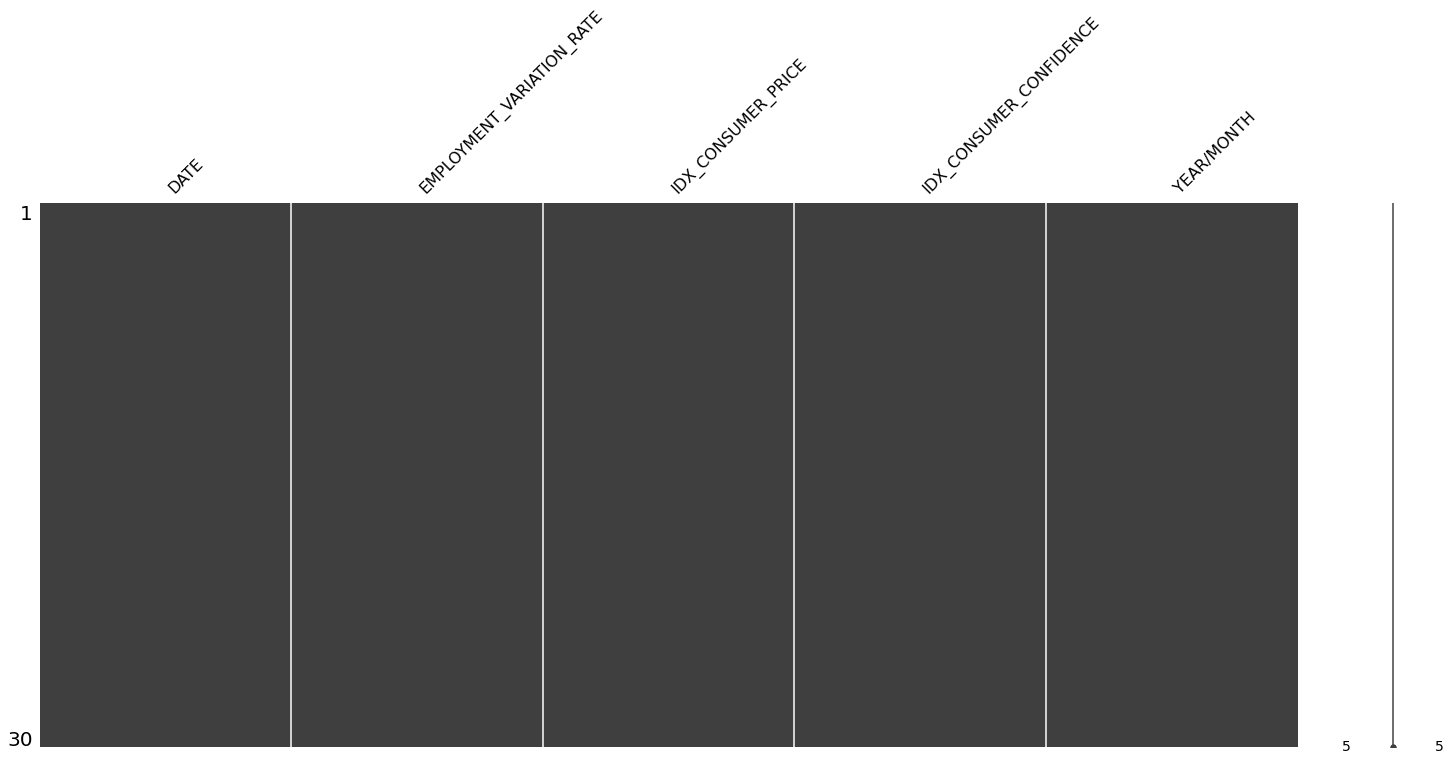

In [248]:
msno.matrix(df)

In [249]:
res = pd.merge(df_data.assign(grouper=df_data['YEAR/MONTH']),
               df.assign(grouper=df['YEAR/MONTH']),
               how='left', on='grouper')

In [250]:
res = res.drop(columns=['YEAR/MONTH_y', 'YEAR/MONTH_x' , 'DATE_y' , 'grouper'])
res = res.rename(columns={'DATE_x': 'DATE'})


In [251]:
res.to_csv('data/df_merged.csv', index=False)

In [252]:
df_merged = res.copy(deep=True)

In [253]:
df_merged = df_merged[df_merged['AGE'] != 123]
df_merged.shape

(43330, 19)

In [254]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df_merged['JOB_TYPE'])
le.classes_
test = le.transform(df_merged['JOB_TYPE'])
df_merged['JOB_TYPE'] = le.transform(df_merged['JOB_TYPE'])


In [255]:
df_merged.head()

,DATE,AGE,JOB_TYPE,STATUS,EDUCATION,HAS_DEFAULT,BALANCE,HAS_HOUSING_LOAN,HAS_PERSO_LOAN,CONTACT,DURATION_CONTACT,NB_CONTACT,NB_DAY_LAST_CONTACT,NB_CONTACT_LAST_CAMPAIGN,RESULT_LAST_CAMPAIGN,SUBSCRIPTION,EMPLOYMENT_VARIATION_RATE,IDX_CONSUMER_PRICE,IDX_CONSUMER_CONFIDENCE
0,2008-05-05,58,7,Marié,Tertiaire,No,2143,Yes,0.0,Fixe,261,1,-1,0,Autre,No,1.1,93.994,-36.4
2,2008-05-05,33,4,Marié,Secondaire,No,2,Yes,1.0,Portable,76,1,-1,0,Autre,No,1.1,93.994,-36.4
3,2008-05-05,47,2,Marié,Primaire,No,1506,Yes,0.0,Portable,92,1,-1,0,Autre,No,1.1,93.994,-36.4
4,2008-05-05,33,2,Célibataire,Primaire,No,1,No,0.0,Portable,198,1,-1,0,Autre,No,1.1,93.994,-36.4
5,2008-05-05,35,7,Marié,Tertiaire,No,231,Yes,0.0,Portable,139,1,-1,0,Autre,No,1.1,93.994,-36.4


In [256]:
df_labelled = df_merged.copy(deep=True)

In [257]:
list_freq = df_labelled.groupby('STATUS').size()/len(df_labelled)
print(list_freq)
df_labelled['STATUS'] = df_labelled['STATUS'].map(list_freq)


STATUS
Célibataire    0.283245
Divorcé        0.114655
Marié          0.602100
dtype: float64


In [258]:
df_labelled.head()

,DATE,AGE,JOB_TYPE,STATUS,EDUCATION,HAS_DEFAULT,BALANCE,HAS_HOUSING_LOAN,HAS_PERSO_LOAN,CONTACT,DURATION_CONTACT,NB_CONTACT,NB_DAY_LAST_CONTACT,NB_CONTACT_LAST_CAMPAIGN,RESULT_LAST_CAMPAIGN,SUBSCRIPTION,EMPLOYMENT_VARIATION_RATE,IDX_CONSUMER_PRICE,IDX_CONSUMER_CONFIDENCE
0,2008-05-05,58,7,0.602100,Tertiaire,No,2143,Yes,0.0,Fixe,261,1,-1,0,Autre,No,1.1,93.994,-36.4
2,2008-05-05,33,4,0.602100,Secondaire,No,2,Yes,1.0,Portable,76,1,-1,0,Autre,No,1.1,93.994,-36.4
3,2008-05-05,47,2,0.602100,Primaire,No,1506,Yes,0.0,Portable,92,1,-1,0,Autre,No,1.1,93.994,-36.4
4,2008-05-05,33,2,0.283245,Primaire,No,1,No,0.0,Portable,198,1,-1,0,Autre,No,1.1,93.994,-36.4
5,2008-05-05,35,7,0.602100,Tertiaire,No,231,Yes,0.0,Portable,139,1,-1,0,Autre,No,1.1,93.994,-36.4


In [259]:
list_freq = df_labelled.groupby('EDUCATION').size()/len(df_labelled)
print(list_freq)
df_labelled['EDUCATION'] = df_labelled['EDUCATION'].map(list_freq)

EDUCATION
Primaire      0.166097
Secondaire    0.535172
Tertiaire     0.298731
dtype: float64


In [260]:
df_labelled.head()

,DATE,AGE,JOB_TYPE,STATUS,EDUCATION,HAS_DEFAULT,BALANCE,HAS_HOUSING_LOAN,HAS_PERSO_LOAN,CONTACT,DURATION_CONTACT,NB_CONTACT,NB_DAY_LAST_CONTACT,NB_CONTACT_LAST_CAMPAIGN,RESULT_LAST_CAMPAIGN,SUBSCRIPTION,EMPLOYMENT_VARIATION_RATE,IDX_CONSUMER_PRICE,IDX_CONSUMER_CONFIDENCE
0,2008-05-05,58,7,0.602100,0.298731,No,2143,Yes,0.0,Fixe,261,1,-1,0,Autre,No,1.1,93.994,-36.4
2,2008-05-05,33,4,0.602100,0.535172,No,2,Yes,1.0,Portable,76,1,-1,0,Autre,No,1.1,93.994,-36.4
3,2008-05-05,47,2,0.602100,0.166097,No,1506,Yes,0.0,Portable,92,1,-1,0,Autre,No,1.1,93.994,-36.4
4,2008-05-05,33,2,0.283245,0.166097,No,1,No,0.0,Portable,198,1,-1,0,Autre,No,1.1,93.994,-36.4
5,2008-05-05,35,7,0.602100,0.298731,No,231,Yes,0.0,Portable,139,1,-1,0,Autre,No,1.1,93.994,-36.4


In [261]:
dict_bin = {'Yes':1, 'No':0}
#df_labelled.replace({'HAS_PERSO_LOAN' : dict_bin}, inplace = True)
df_labelled.replace({'HAS_DEFAULT' : dict_bin}, inplace = True)
df_labelled.replace({'HAS_HOUSING_LOAN' : dict_bin}, inplace = True)

In [262]:
list_freq = df_labelled.groupby('CONTACT').size()/len(df_labelled)
print(list_freq)
df_labelled['CONTACT'] = df_labelled['CONTACT'].map(list_freq)



CONTACT
Fixe        0.241495
Portable    0.758505
dtype: float64


In [263]:
df_cleaned = df_labelled.copy(deep=True)
df_cleaned.replace({'RESULT_LAST_CAMPAIGN' : {'Autre': 'No_contact'}}, inplace = True)

In [264]:
df_cleaned['RESULT_LAST_CAMPAIGN']

0        No_contact
2        No_contact
3        No_contact
4        No_contact
5        No_contact
            ...    
45131    No_contact
45132        Succes
45133         Echec
45134        Succes
45135    No_contact
Name: RESULT_LAST_CAMPAIGN, Length: 43330, dtype: object

In [265]:
df_cleaned = pd.get_dummies(df_cleaned , columns=["RESULT_LAST_CAMPAIGN"], prefix=["last_campaign_is"])


In [266]:
dict_bin = {'Yes':1, 'No':0}
df_cleaned.replace({'SUBSCRIPTION' : dict_bin}, inplace = True)

In [267]:
def get_missing_percent(df_tmp):
    sum_na = df_tmp.isna().sum()
    size = df_tmp.shape[0]
    percents_missing = sum_na / size * 100
    sorted_percents = percents_missing.sort_values(ascending=False)
    print(f"###\n###\n### Pourcentage de valeurs manquantes par colonnes \n###\n###\n###\n{sorted_percents}")

In [268]:
get_missing_percent(df_cleaned)

###
###
### Pourcentage de valeurs manquantes par colonnes 
###
###
###
last_campaign_is_Succes        0.0
CONTACT                        0.0
AGE                            0.0
JOB_TYPE                       0.0
STATUS                         0.0
EDUCATION                      0.0
HAS_DEFAULT                    0.0
BALANCE                        0.0
HAS_HOUSING_LOAN               0.0
HAS_PERSO_LOAN                 0.0
DURATION_CONTACT               0.0
last_campaign_is_No_contact    0.0
NB_CONTACT                     0.0
NB_DAY_LAST_CONTACT            0.0
NB_CONTACT_LAST_CAMPAIGN       0.0
SUBSCRIPTION                   0.0
EMPLOYMENT_VARIATION_RATE      0.0
IDX_CONSUMER_PRICE             0.0
IDX_CONSUMER_CONFIDENCE        0.0
last_campaign_is_Echec         0.0
DATE                           0.0
dtype: float64


In [269]:
rcParams['figure.figsize'] = 20,17
correlation_matrix = df_cleaned.corr(method="spearman")

In [270]:
Y = df_cleaned['SUBSCRIPTION'].to_numpy()
Y
X = df_cleaned.drop(columns=['DATE',"SUBSCRIPTION"]).to_numpy()
X

array([[58.        ,  7.        ,  0.60210016, ...,  0.        ,
         1.        ,  0.        ],
       [33.        ,  4.        ,  0.60210016, ...,  0.        ,
         1.        ,  0.        ],
       [47.        ,  2.        ,  0.60210016, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [24.        ,  5.        ,  0.28324486, ...,  1.        ,
         0.        ,  0.        ],
       [70.        ,  8.        ,  0.60210016, ...,  0.        ,
         0.        ,  1.        ],
       [53.        ,  2.        ,  0.60210016, ...,  0.        ,
         1.        ,  0.        ]])

In [271]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
test_size= 0.20
seed = 7
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=test_size, random_state=seed)

In [272]:
Y_train

array([0, 0, 0, ..., 0, 1, 0])

In [273]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [274]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))


In [275]:
X_train

array([[49.        , 10.        ,  0.60210016, ...,  0.        ,
         1.        ,  0.        ],
       [48.        ,  9.        ,  0.60210016, ...,  0.        ,
         1.        ,  0.        ],
       [29.        ,  7.        ,  0.28324486, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [39.        ,  2.        ,  0.60210016, ...,  0.        ,
         1.        ,  0.        ],
       [41.        ,  7.        ,  0.11465497, ...,  1.        ,
         0.        ,  0.        ],
       [60.        ,  3.        ,  0.60210016, ...,  0.        ,
         1.        ,  0.        ]])

In [276]:
np.where(np.isnan(X_train))

(array([], dtype=int64), array([], dtype=int64))

In [278]:
results_c = []
names_c = []

for name, model in models:
    # define how to split off validation data ('kfold' how many folds)
    kfold = KFold(n_splits=10, random_state=seed)    
    # train the model
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')    
    results_c.append(cv_results)
    names_c.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/Users/emiliodesousa/Documents/Yotta_Academy/Projets/Machine_Learning/productsubscription_eds_dm/.venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/Users/emiliodesousa/Documents/Yotta_Academy/Projets/Machine_Learning/productsubscription_eds_dm/.venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/emiliodesousa/Docume

LR: 0.893116 (0.005950)
KNN: 0.884058 (0.005378)


/Users/emiliodesousa/Documents/Yotta_Academy/Projets/Machine_Learning/productsubscription_eds_dm/.venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


CART: 0.876355 (0.005161)
NB: 0.840786 (0.006749)


/Users/emiliodesousa/Documents/Yotta_Academy/Projets/Machine_Learning/productsubscription_eds_dm/.venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
